<a href="https://colab.research.google.com/github/chuxyno/School/blob/main/House_Rent_ML_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

**Read dataset from shared Google Drive**

In [ ]:
url = "https://drive.google.com/file/d/11xixCA2iSjh6f82gfbc5STagMjv9RlZB/view?usp=sharing"
# Extract the file ID from the URL
file_id = url.split("/")[-2]

# Construct the download URL
dwn_url = "https://drive.google.com/uc?id=" + file_id

# Read the CSV file into a pandas DataFrame
dt = pd.read_csv(dwn_url)

# Print the DataFrame
#print(dt)
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**Method to split the Floor column**

In [ ]:
def listToString(s):
  str1 = ""
  for ele in s:
    str1 += ele
  if str1 =='':
    str1='0'
  return str1

def splitCol(col):
  sep_string = ' out of '
  sep = col.find(sep_string)
  col_len = len(col)
  sep_len = len(sep_string)
  rent_floor = []
  building_floors = []
  unknown = []
  if sep==0:
    rent_floor.append(0)
    building_floors.append(0)
  elif sep == -1:
    if col == 'Ground':
      rent_floor.append('0')
      building_floors.append('0')
  elif 'Upper Basement out of ' in col:
    building_floors.append((listToString((col[sep_len + len(col[:sep]):]))))
    rent_floor.append('-1')    
  elif 'Lower Basement out of ' in col:
    building_floors.append((listToString((col[sep_len + len(col[:sep]):]))))
    rent_floor.append('-2')    
  elif 'Ground out of ' in col:
    building_floors.append((listToString((col[sep_len + len(col[:sep]):]))))
    rent_floor.append('0')    
  else:
    rent_floor.append(col[:sep])
    building_floors.append(col[sep_len + len(rent_floor):])

  
  result = [rent_floor,building_floors]
  return result

In [ ]:
X_ = dt

In [ ]:
X_.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Check for NaN values in the dataset**

In [ ]:
X_.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**Plot pairwise relationship in the dataset**

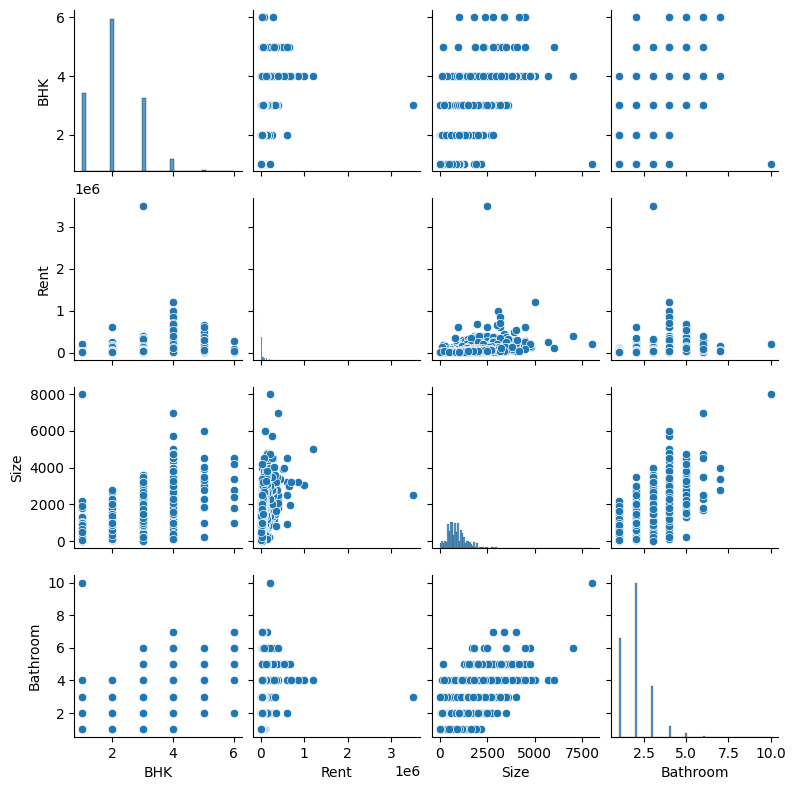

In [ ]:
sns.pairplot(X_,height=2)
plt.show()

**Compute pairwise correlation of columns in the daaset**

<ipython-input-8-85053dd0bd69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_.corr()


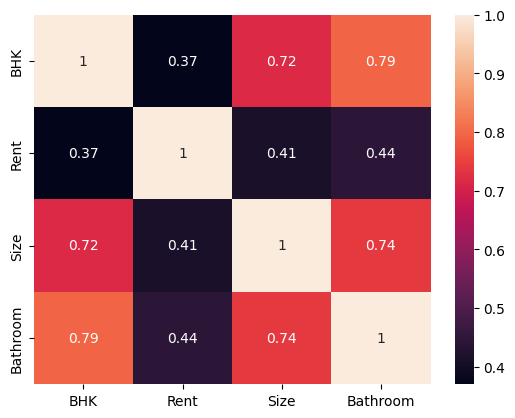

In [ ]:
corr_matrix = X_.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Rent (Our Target Variable)**

In [ ]:
import plotly.express as px
fig = px.histogram(X_,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(X_, x="Rent", title='Boxplot for Rent Prices')
fig.show()

Rent has extreme outliers that needs to be resolved

**BHK**

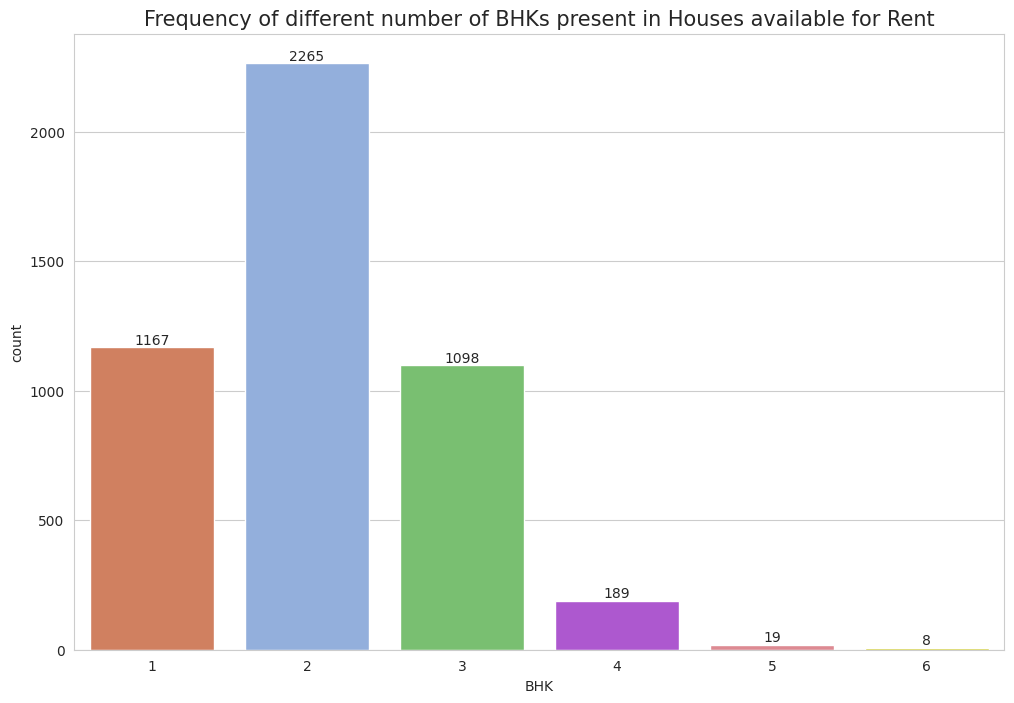

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=X_, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(X_, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

**Bathroom**

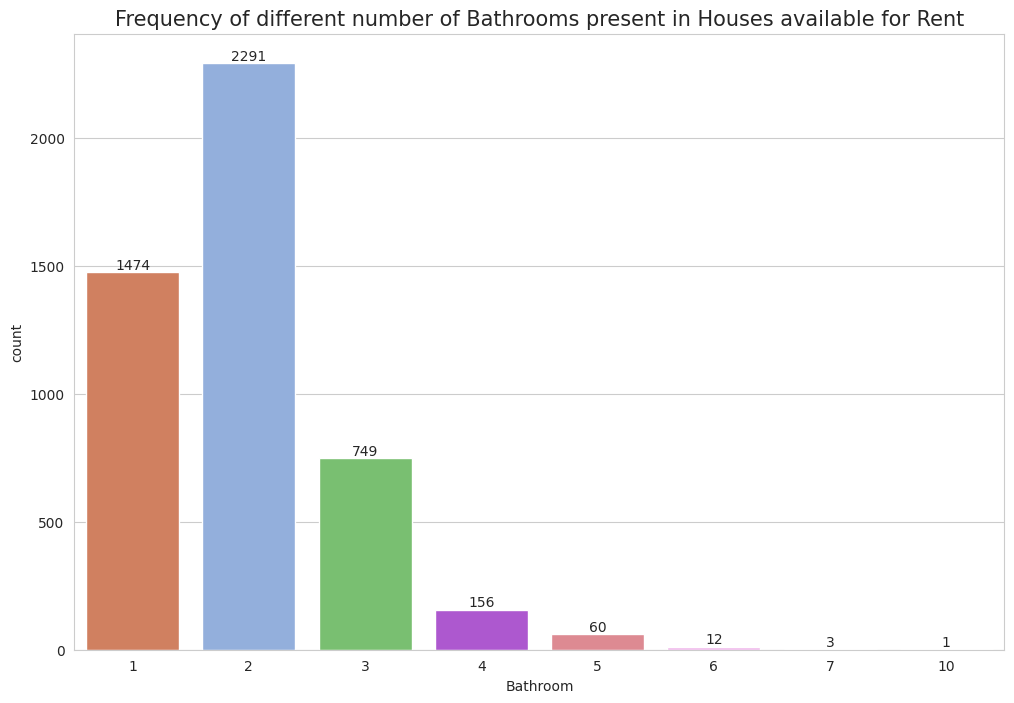

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=X_, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(X_, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

**City**

In [ ]:
X_['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

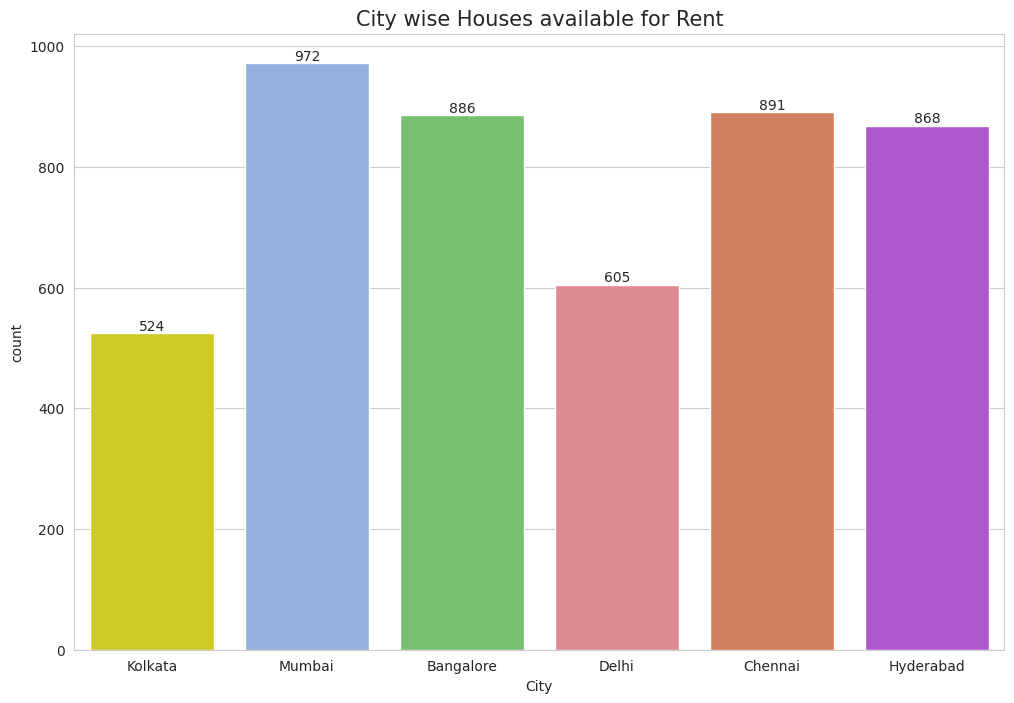

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=X_, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(X_, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()


**Area Type**

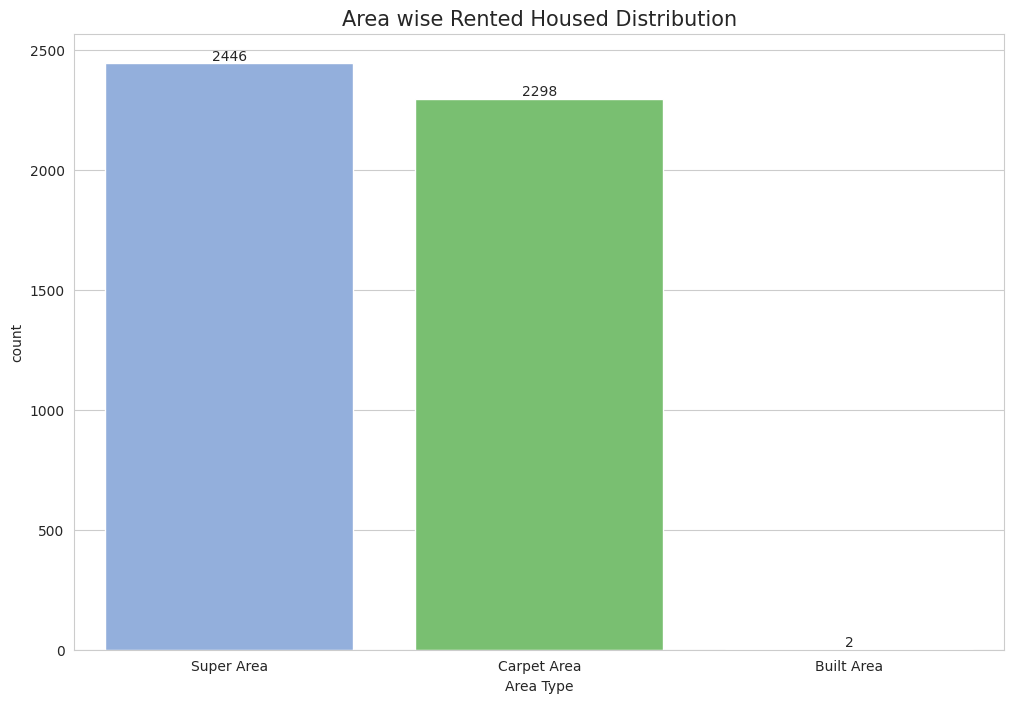

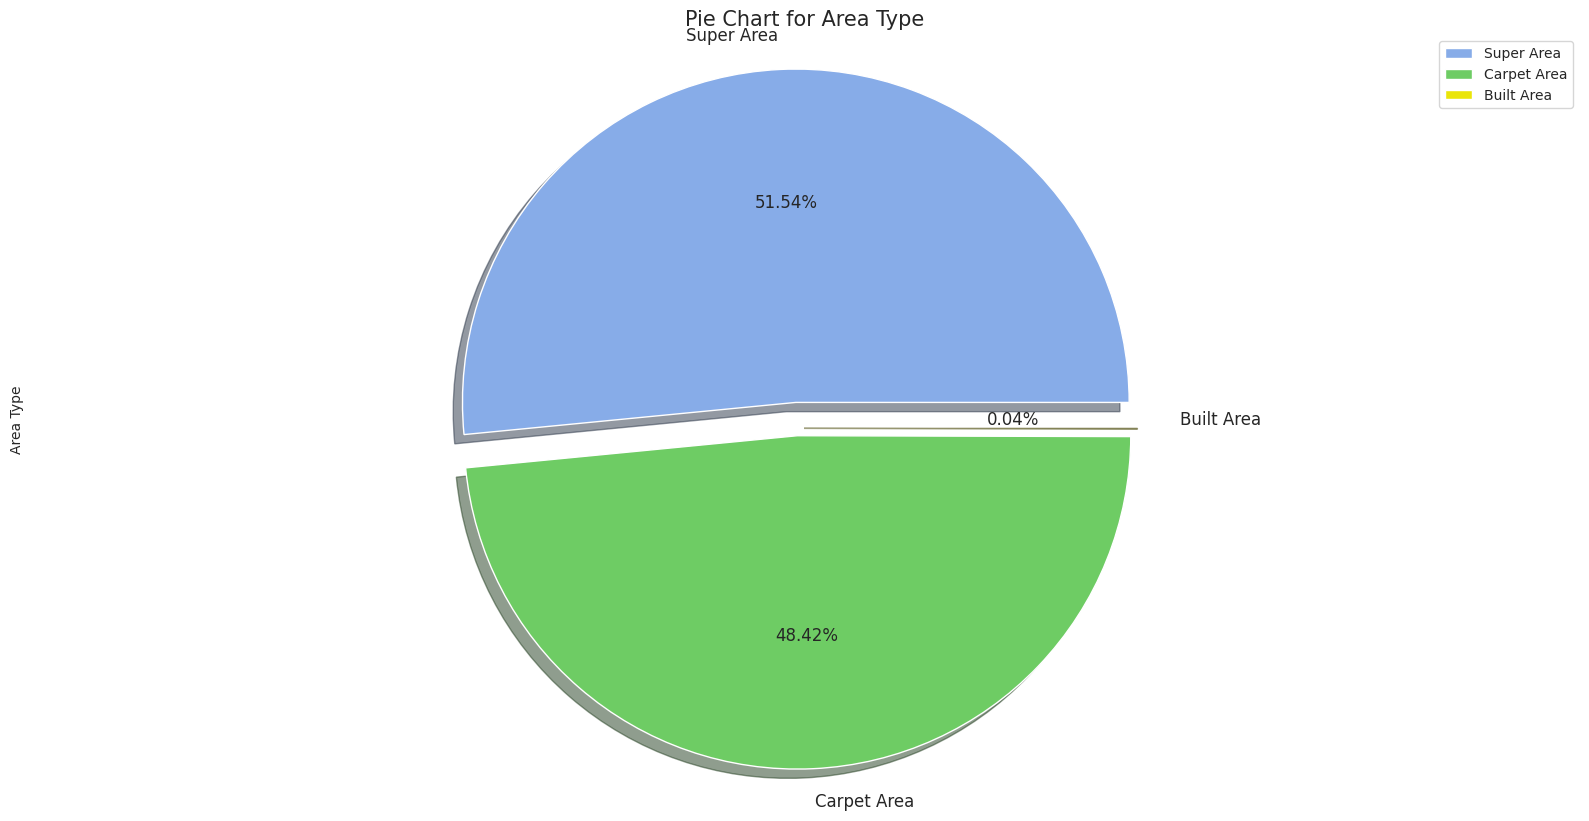

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=X_, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
X_['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

**Point of Contact**

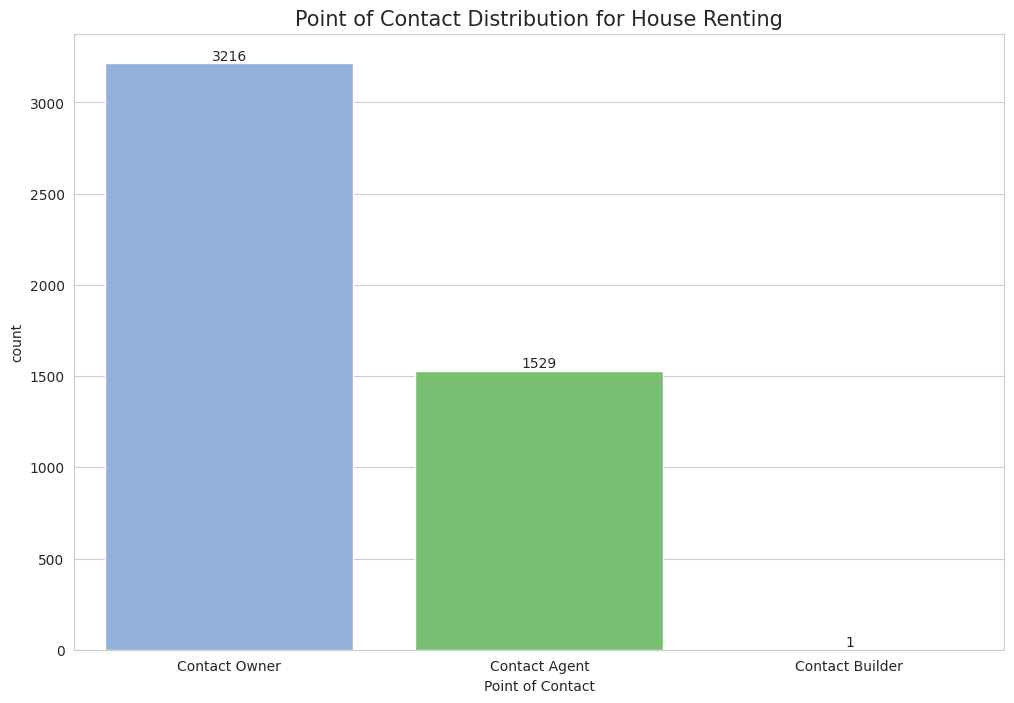

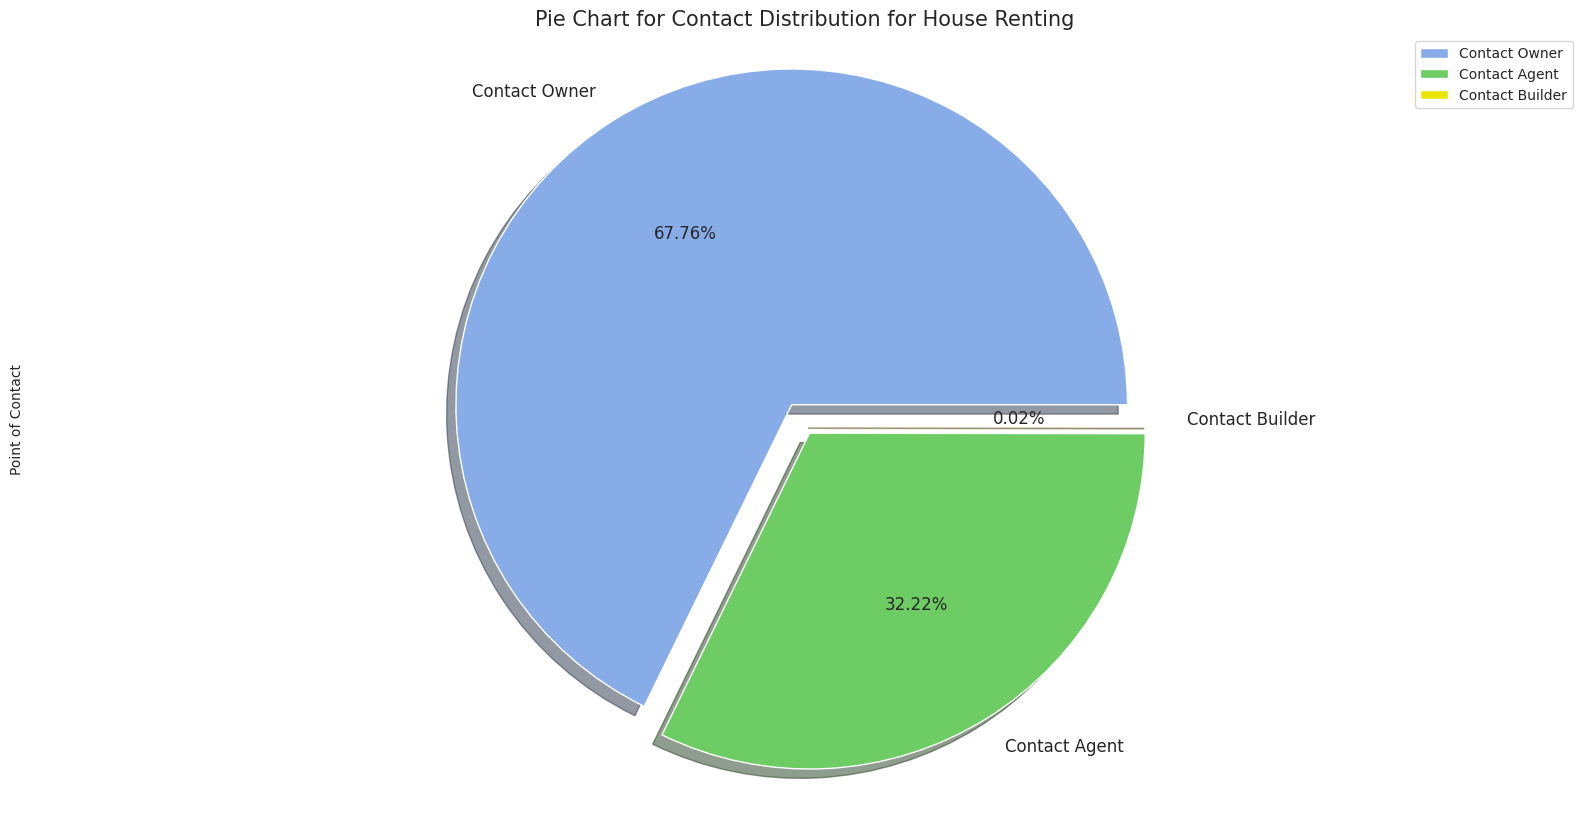

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=X_, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
X_['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Contact Distribution for House Renting',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

**Tenant Preferred**

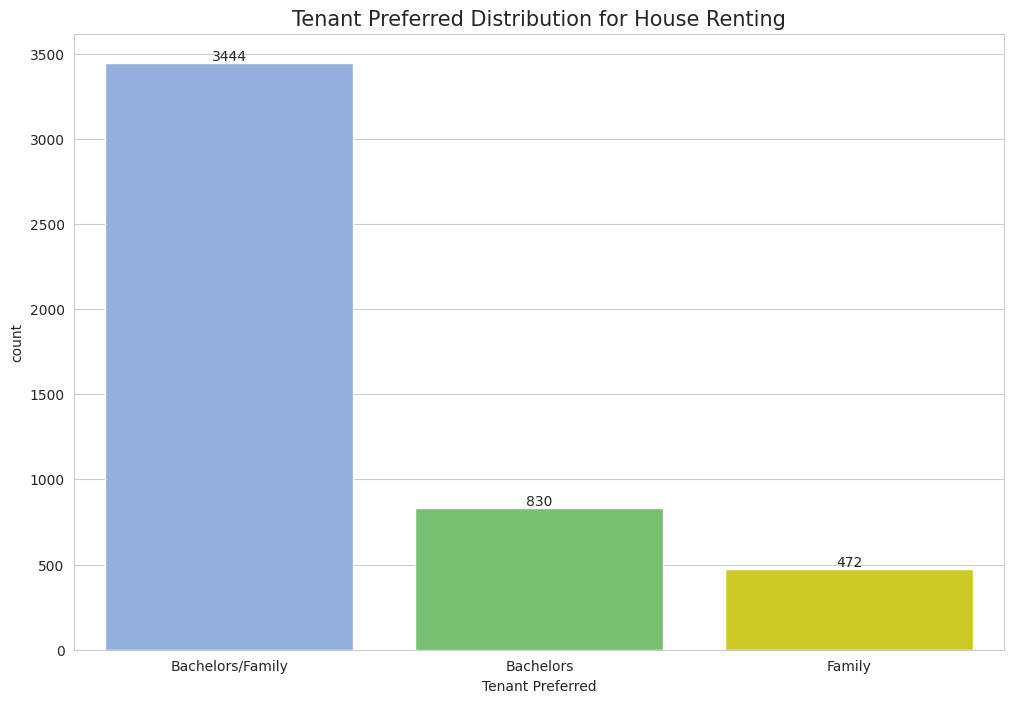

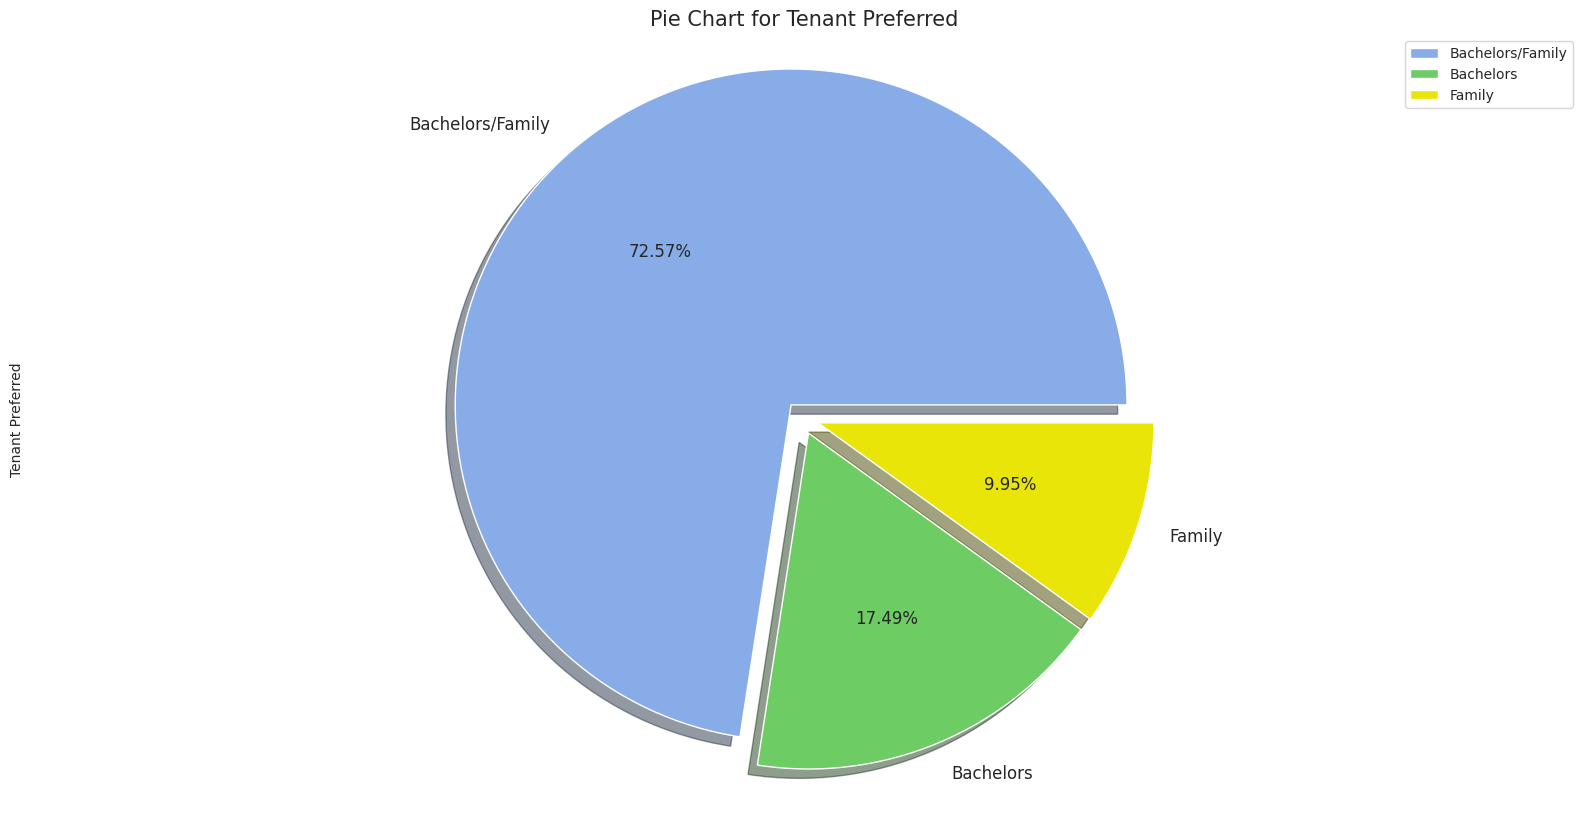

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=X_, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
X_['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

**Furnishing Status**

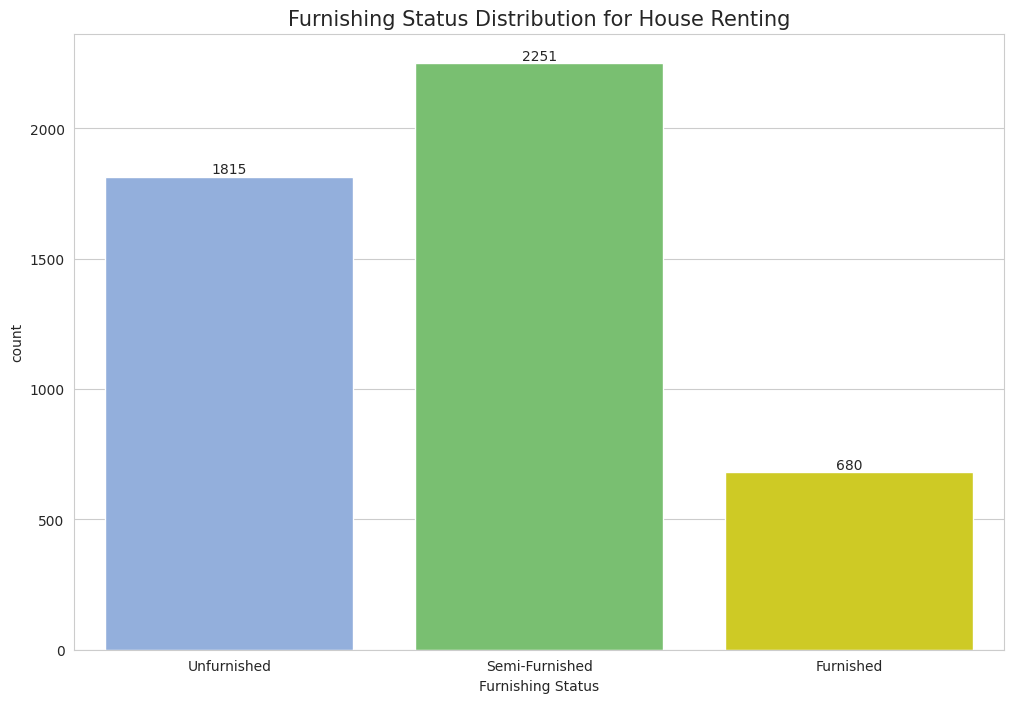

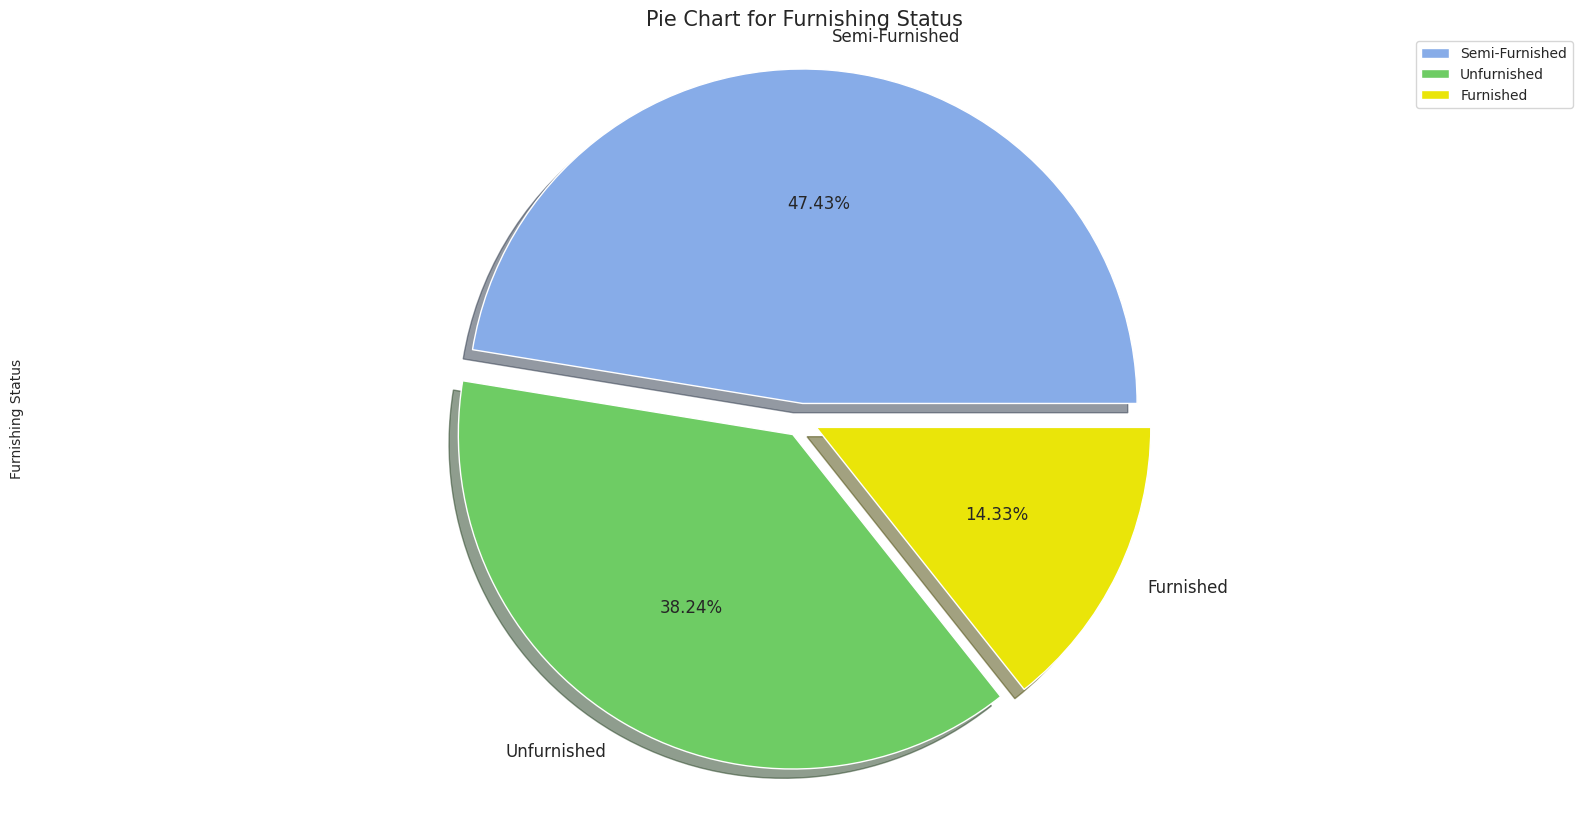

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=X_, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
X_['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

**Size**

In [ ]:
fig = px.histogram(X_, x="Size", title='Size Distribution')
fig.show()
fig = px.box(X_, x="Size", title='Boxplot for Size')
fig.show()

**Observations**:

The smallest house rented has size of about 10 sq. feet.
The biggest house rented has size of about 8000 sq. feet.
The median of house rented has size of about 850 sq. feet. 

**Convert categorical variables into dummy variables**

In [ ]:
X = pd.get_dummies(X_, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
X.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1


**Method to seperate floor colum**

In [ ]:
#Seperate floor column into two columns of rent floor and number of floors in building
rent_floor = []
building_floor = []
rent = []
for f in X_['Floor'].str.strip(''):
  r = splitCol(f)
  rent_floor.append(int(''.join(listToString(r[0]))))
  building_floor.append(int(''.join(listToString(r[1]))))

**Drop Rent, Floor and Area Locality Columns**. Rent is the target column while Floor has been extended. 

In [ ]:
X = X.drop([X.columns[2],X.columns[4],X.columns[5]], axis =1)
X.head()

,Posted On,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
X['Building Floors'] = building_floor
X['Rent Floor'] = rent_floor
X.head()

,Posted On,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Building Floors,Rent Floor
0,2022-05-18,2,1100,2,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,2,0
1,2022-05-13,2,800,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,3,1
2,2022-05-16,2,1000,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,3,1
3,2022-07-04,2,800,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,2,1
4,2022-05-09,2,850,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,2,1


**Convert datetime value in 'Posted On' column** to int indication Month

In [ ]:
from datetime import datetime
#dateLabels = ['April', 'May', 'June', 'July']
dateInt = []
dateRaw = X['Posted On']
for d in dateRaw:
  date_split = d.split("-")
  dateInt.append(int(date_split[1]))

X['Posted On'] = dateInt

In [ ]:
X.head()

,Posted On,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Building Floors,Rent Floor
0,5,2,1100,2,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,2,0
1,5,2,800,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,3,1
2,5,2,1000,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,3,1
3,7,2,800,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,2,1
4,5,2,850,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,2,1


In [ ]:
X.dtypes

Posted On                            int64
BHK                                  int64
Size                                 int64
Bathroom                             int64
Area Type_Built Area                 uint8
Area Type_Carpet Area                uint8
Area Type_Super Area                 uint8
City_Bangalore                       uint8
City_Chennai                         uint8
City_Delhi                           uint8
City_Hyderabad                       uint8
City_Kolkata                         uint8
City_Mumbai                          uint8
Furnishing Status_Furnished          uint8
Furnishing Status_Semi-Furnished     uint8
Furnishing Status_Unfurnished        uint8
Tenant Preferred_Bachelors           uint8
Tenant Preferred_Bachelors/Family    uint8
Tenant Preferred_Family              uint8
Point of Contact_Contact Agent       uint8
Point of Contact_Contact Builder     uint8
Point of Contact_Contact Owner       uint8
Building Floors                      int64
Rent Floor 

***#Perform a robust scaler transform of the dataset to handle outliers***

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
X = trans.fit_transform(X)

In [ ]:
# convert the array back to a dataframe
from pandas import DataFrame
dt = DataFrame(X)

In [ ]:
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.0,0.0,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.50,-1.0
1,-1.0,0.0,-0.076923,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.5
2,-1.0,0.0,0.230769,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.5
3,1.0,0.0,-0.076923,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.50,-0.5
4,-1.0,0.0,0.000000,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-0.50,-0.5


**Method to classify rent into three categories**

In [ ]:
#Method to classiy rents into three categories
r1 = np.quantile(X_['Rent'], .25)
r2 = np.quantile(X_['Rent'], .50)
r3 = np.quantile(X_['Rent'], .75)


def classify_rent(rent_paid):
  if rent_paid <= r1:
    return 0
  elif rent_paid <= r2:
    return 1
  else:
    return 2

In [ ]:
rent = []
for r in X_['Rent']:
  rent.append(classify_rent(r))

y = rent

**Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

***Handling imbalance data using SMOTE based techniques***

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 1845, 0: 1067, 1: 884})
After Counter({2: 1845, 1: 1845, 0: 1845})


In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 1845, 0: 1067, 1: 884})
After Counter({1: 1928, 2: 1845, 0: 1748})


In [ ]:
#SMOTE + TOMEK
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 1845, 0: 1067, 1: 884})
After Counter({0: 1745, 2: 1740, 1: 1720})


In [ ]:
# SMOTE+ ENN
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 1845, 0: 1067, 1: 884})
After Counter({0: 1146, 2: 1137, 1: 896})


**Model Building with Robust Scaler Transforms and RepeatedStratifiedKFold**

In [ ]:
#RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

**Method to print accuracy measurement**

In [ ]:
def print_accuracy(model, cv):
  n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  n_scores_ada = cross_val_score(model, X_train_ada, y_train_ada, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  n_scores_sm = cross_val_score(model, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  n_scores_smenn = cross_val_score(model, X_train_smenn, y_train_smenn, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  n_scores_smtom = cross_val_score(model, X_train_smtom, y_train_smtom, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report model performance
  print('Accuracy of no SMOTE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  print('Accuracy of SMOTE Data: %.3f (%.3f)' % (mean(n_scores_sm), std(n_scores_sm)))
  print('Accuracy of ADASYN Data: %.3f (%.3f)' % (mean(n_scores_ada), std(n_scores_ada)))
  print('Accuracy of SMOTE+ ENN Data: %.3f (%.3f)' % (mean(n_scores_smenn), std(n_scores_smenn)))
  print('Accuracy of SMOTE + TOMEK Data: %.3f (%.3f)' % (mean(n_scores_smtom), std(n_scores_smtom)))
  model.fit(X_train_smenn, y_train_smenn)
  x_smenn, Y_smenn = smenn.fit_resample(X_test, y_test)  
  test_predict=model.predict(x_smenn)
  print("Accuracy on testing data of SMOTE+ ENN: ", metrics.accuracy_score(Y_smenn, test_predict))
  n_scores_smenn = cross_val_score(model, x_smenn, Y_smenn, scoring='accuracy', n_jobs=-1, error_score='raise')
  print('Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: %.3f (%.3f)' % (mean(n_scores_smenn), std(n_scores_smenn)))
  print("Precision on testing data of SMOTE+ ENN:", metrics.precision_score(Y_smenn, test_predict, average='weighted'))
  print("Recall on testing data of SMOTE+ ENN: ", metrics.recall_score(Y_smenn, test_predict, average='weighted'))

  calc_f1(Y_smenn, test_predict)
  
  # Evaluation metrics
  mae_rf = metrics.mean_absolute_error(Y_smenn, test_predict)
  mse_rf =  metrics.mean_squared_error(Y_smenn, test_predict)
  rmse_rf =  np.sqrt(mse_rf)
  sc_rf = model.score(x_smenn,Y_smenn)
  print('MAE:', mae_rf)
  print('MSE:', mse_rf)
  print('RMSE:', rmse_rf)
  print('SCORE:', sc_rf)
  # Calculate the R-squared value
  r_squared = r2_score(Y_smenn, test_predict)
  print("R-squared value:", r_squared)
  
  #print(confusion_matrix(Y_smenn, test_predict))
  cm = confusion_matrix(Y_smenn, test_predict) 
  fig, ax = plt.subplots(figsize=(8, 8)) 
  ax.imshow(cm) 
  ax.grid(False) 
  ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted 0s', 'Predicted 1s' , 'Predicted 2s')) 
  ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s')) 
  #ax.set_ylim(2.5, -0.5, -1.5) 
  #ax.set_xticks(2.5, -0.5, -1.5)
  for i in range(3):
    for j in range(3):
      for k in range(3):
        ax.text( j, i, cm[i, j], ha='center', va='center', color='red') 
  plt.show()

In [ ]:
def calc_f1(y_true, y_pred):
  #Calculate F1 Score
  # calculate F1 score
  f1 = f1_score(y_true, y_pred, average='weighted')
  # print F1 score
  print('F1 score of SMOTE+ ENN:', f1)
  # calculate macro-averaged F1 score
  f1_macro = f1_score(y_true, y_pred, average='macro')
  print('Macro-averaged F1 score:', f1_macro)
  # calculate micro-averaged precision score
  precision_micro = precision_score(y_true, y_pred, average='micro')
  print('Micro-averaged precision score:', precision_micro)

In [ ]:
def cm(y_test, pred):
  #print(confusion_matrix(Y_smenn, test_predict))
  cm = confusion_matrix(y_test, pred) 
  fig, ax = plt.subplots(figsize=(8, 8)) 
  ax.imshow(cm) 
  ax.grid(False) 
  ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted 0s', 'Predicted 1s' , 'Predicted 2s')) 
  ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s')) 
    #ax.set_ylim(2.5, -0.5, -1.5) 
    #ax.set_xticks(2.5, -0.5, -1.5)
  for i in range(3):
    for j in range(3):
      for k in range(3):
        ax.text( j, i, cm[i, j], ha='center', va='center', color='red') 
  plt.show()

**KNN**

Accuracy of no SMOTE: 0.710 (0.020)
Accuracy of SMOTE Data: 0.774 (0.021)
Accuracy of ADASYN Data: 0.730 (0.015)
Accuracy of SMOTE+ ENN Data: 0.956 (0.011)
Accuracy of SMOTE + TOMEK Data: 0.790 (0.016)
Accuracy on testing data of SMOTE+ ENN:  0.8090322580645162
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.946 (0.014)
Precision on testing data of SMOTE+ ENN: 0.8124099915311166
Recall on testing data of SMOTE+ ENN:  0.8090322580645162
F1 score of SMOTE+ ENN: 0.8084467497316493
Macro-averaged F1 score: 0.8079514072285522
Micro-averaged precision score: 0.8090322580645162
MAE: 0.19225806451612903
MSE: 0.19483870967741934
RMSE: 0.4414053802089632
SCORE: 0.8090322580645162
R-squared value: 0.7156246658696138


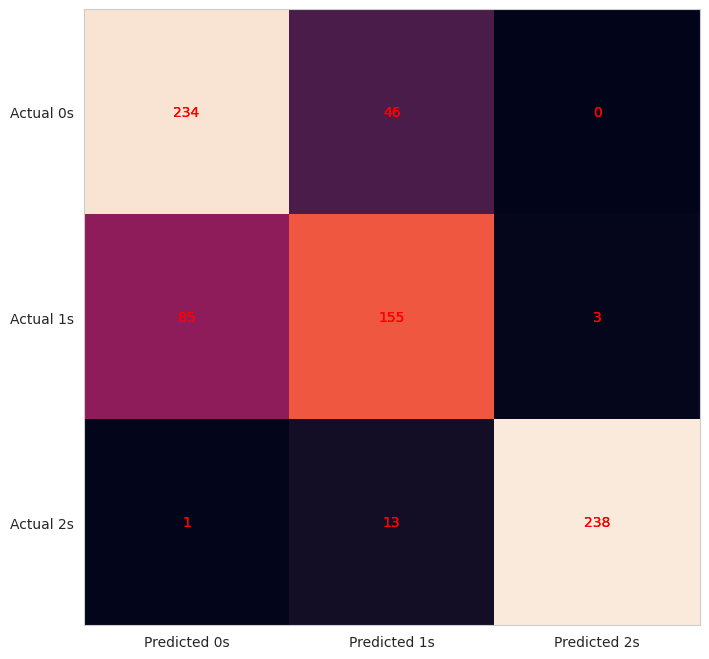

In [ ]:
# evaluate knn on the raw scaled dataset
model = KNeighborsClassifier()
print_accuracy(model,cv)

**KNN with hyperparameter tuning**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
def best_knn_n(model, X,y, param_grid):
  # Use GridSearchCV to find the optimal value of n
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X, y)

  # Print the best parameter value
  return grid_search.best_params_

1
Accuracy of no SMOTE: 0.681 (0.020)
Accuracy of SMOTE Data: 0.822 (0.019)
Accuracy of ADASYN Data: 0.832 (0.015)
Accuracy of SMOTE+ ENN Data: 0.984 (0.007)
Accuracy of SMOTE + TOMEK Data: 0.874 (0.014)
Accuracy on testing data of SMOTE+ ENN:  0.8025641025641026
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.987 (0.008)
Precision on testing data of SMOTE+ ENN: 0.8040558986961119
Recall on testing data of SMOTE+ ENN:  0.8025641025641026
F1 score of SMOTE+ ENN: 0.8025880136870812
Macro-averaged F1 score: 0.8032051220489856
Micro-averaged precision score: 0.8025641025641026
MAE: 0.2012820512820513
MSE: 0.20897435897435898
RMSE: 0.45713713366380443
SCORE: 0.8025641025641026
R-squared value: 0.6939070309415356


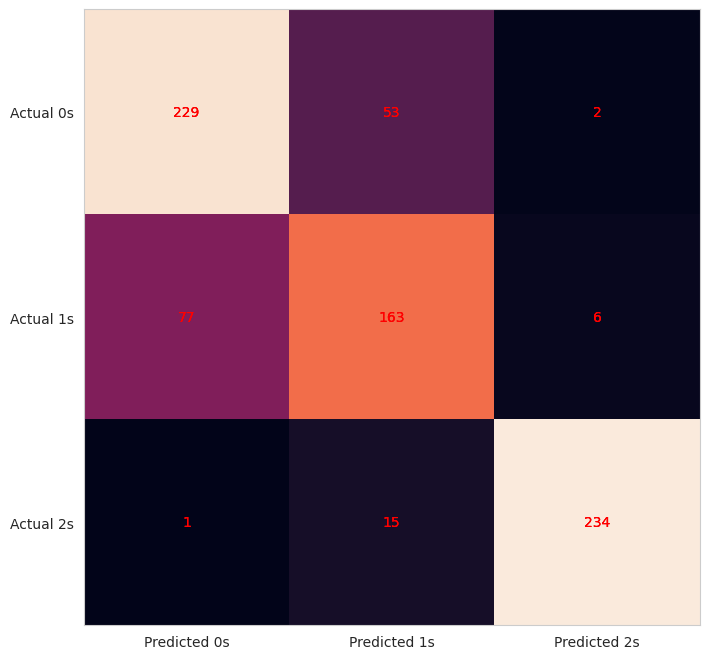

In [ ]:
# define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
# Create the KNN classifier
knn = KNeighborsClassifier()
n = best_knn_n(knn, X_train_smenn, y_train_smenn, param_grid)
print(n['n_neighbors'])
model = KNeighborsClassifier(n_neighbors=n['n_neighbors'])
print_accuracy(model,cv)

**Logistic Regression (liblinear)**

Accuracy of no SMOTE: 0.735 (0.021)
Accuracy of SMOTE Data: 0.714 (0.017)
Accuracy of ADASYN Data: 0.653 (0.019)
Accuracy of SMOTE+ ENN Data: 0.869 (0.020)
Accuracy of SMOTE + TOMEK Data: 0.737 (0.017)
Accuracy on testing data of SMOTE+ ENN:  0.8748387096774194
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.905 (0.014)
Precision on testing data of SMOTE+ ENN: 0.8764134641639365
Recall on testing data of SMOTE+ ENN:  0.8748387096774194
F1 score of SMOTE+ ENN: 0.8726708805193072
Macro-averaged F1 score: 0.8715975814199113
Micro-averaged precision score: 0.8748387096774194
MAE: 0.12903225806451613
MSE: 0.1367741935483871
RMSE: 0.36982995220558745
SCORE: 0.8748387096774194
R-squared value: 0.8012820512820513


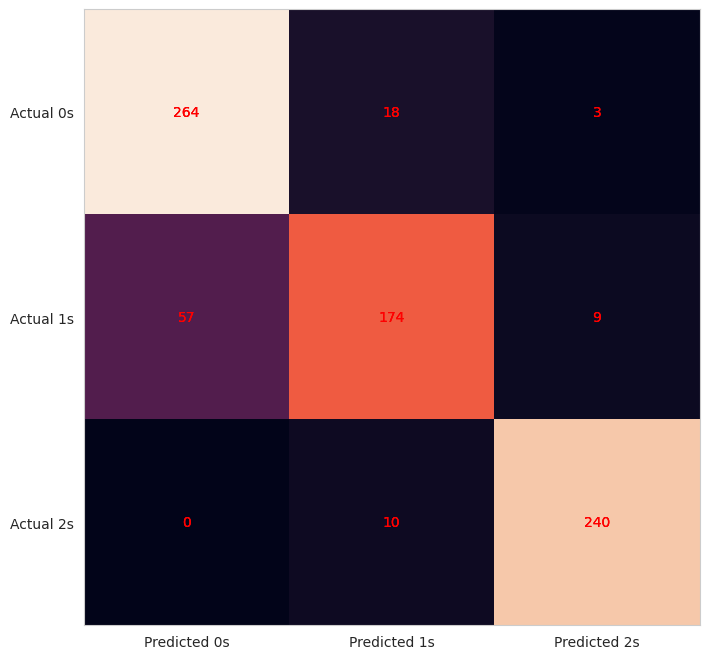

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0) 
print_accuracy(model,cv)

**Logistic Regression (liblinear) with GridSearchCV**

F1 score of SMOTE+ ENN: 0.7137774155997061
Macro-averaged F1 score: 0.683431088094546
Micro-averaged precision score: 0.7010526315789474


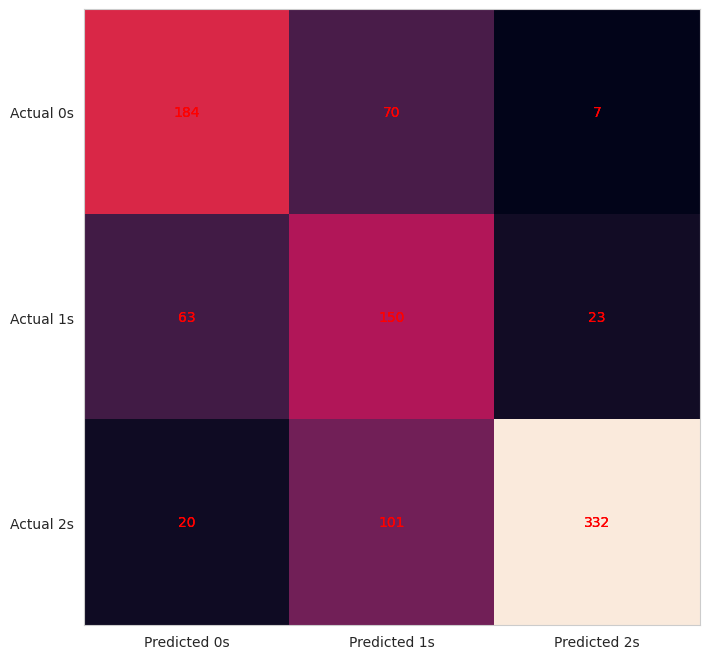

In [ ]:
# define the parameter grid
param_grid = {'C': [1, 10, 20], 'penalty': ['l1', 'l2']}
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0) 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smenn, y_train_smenn)
pred = grid_search.predict(X_test)
calc_f1(y_test,pred)
cm(y_test,pred)

**Logistic Regression (multinomial)**

Accuracy of no SMOTE: 0.742 (0.021)
Accuracy of SMOTE Data: 0.723 (0.017)
Accuracy of ADASYN Data: 0.659 (0.020)
Accuracy of SMOTE+ ENN Data: 0.873 (0.018)
Accuracy of SMOTE + TOMEK Data: 0.746 (0.017)
Accuracy on testing data of SMOTE+ ENN:  0.8885906040268456
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.928 (0.007)
Precision on testing data of SMOTE+ ENN: 0.8955940132333627
Recall on testing data of SMOTE+ ENN:  0.8885906040268456
F1 score of SMOTE+ ENN: 0.8896937244674951
Macro-averaged F1 score: 0.8894899956338308
Micro-averaged precision score: 0.8885906040268456
MAE: 0.11140939597315436
MSE: 0.11140939597315436
RMSE: 0.3337804607420188
SCORE: 0.8885906040268456
R-squared value: 0.8399615918172971


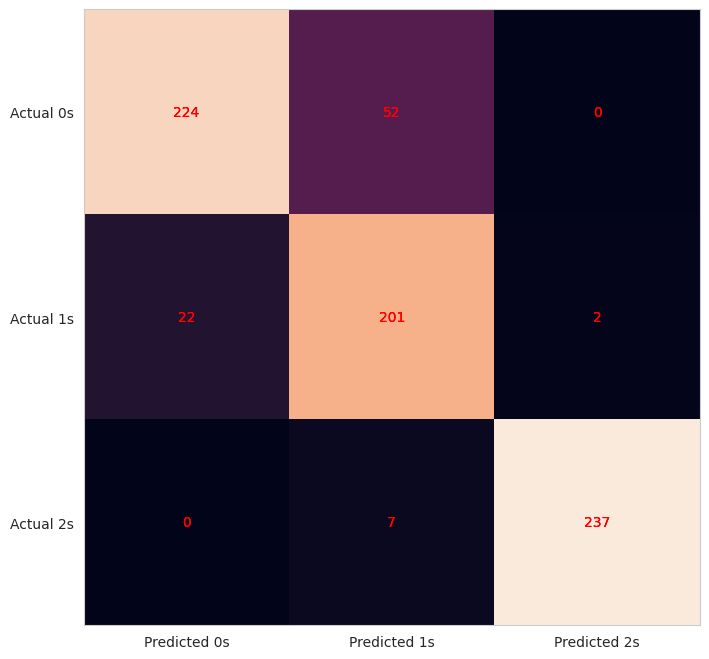

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
print_accuracy(model,cv)

**Support Vector Machine Classification Algorithm**

Accuracy of no SMOTE: 0.738 (0.021)
Accuracy of SMOTE Data: 0.719 (0.017)
Accuracy of ADASYN Data: 0.659 (0.018)
Accuracy of SMOTE+ ENN Data: 0.866 (0.015)
Accuracy of SMOTE + TOMEK Data: 0.744 (0.019)
Accuracy on testing data of SMOTE+ ENN:  0.8791348600508906
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.905 (0.004)
Precision on testing data of SMOTE+ ENN: 0.8791954477160331
Recall on testing data of SMOTE+ ENN:  0.8791348600508906
F1 score of SMOTE+ ENN: 0.87915910895888
Macro-averaged F1 score: 0.8791447839508928
Micro-averaged precision score: 0.8791348600508906
MAE: 0.12086513994910941
MSE: 0.12086513994910941
RMSE: 0.3476566408816455
SCORE: 0.8791348600508906
R-squared value: 0.8240624676022356


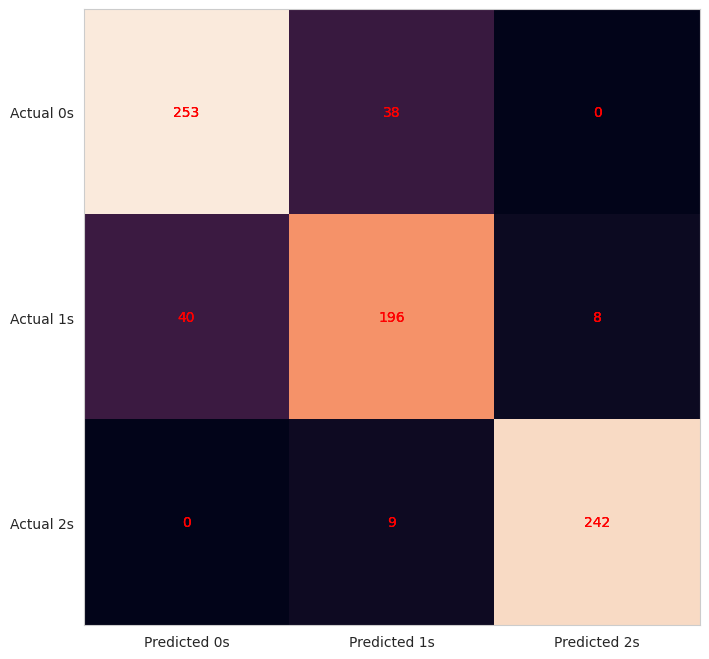

In [ ]:
model = svm.SVC(kernel='linear')
print_accuracy(model,cv)

**Support Vector Machine Classification Algorithm with GridSearchCV**

F1 score of SMOTE+ ENN: 0.6583148858017113
Macro-averaged F1 score: 0.6126297135018803
Micro-averaged precision score: 0.6705263157894736


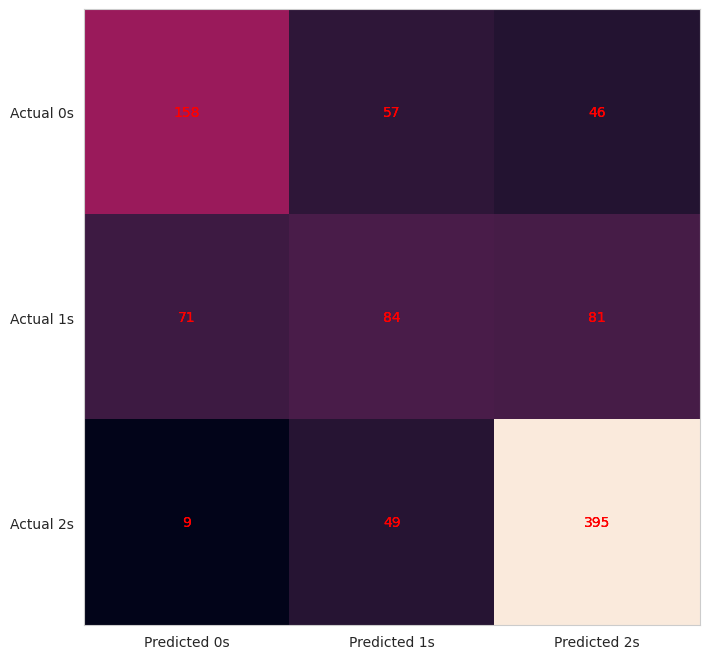

In [ ]:
# define the parameter grid to search over
#param_grid = {'C': [1, 5, 20], 'gamma': [0.1, 1, 'scale', 'auto'], 'kernel': ['linear', 'rbf']}
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}#
model = svm.SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smenn, y_train_smenn)
pred = grid_search.predict(X_test)
calc_f1(y_test,pred)
cm(y_test,pred)

**Decision Tree**

Accuracy of no SMOTE: 0.671 (0.016)
Accuracy of SMOTE Data: 0.744 (0.017)
Accuracy of ADASYN Data: 0.715 (0.021)
Accuracy of SMOTE+ ENN Data: 0.921 (0.012)
Accuracy of SMOTE + TOMEK Data: 0.773 (0.018)
Accuracy on testing data of SMOTE+ ENN:  0.8122555410691004
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.917 (0.009)
Precision on testing data of SMOTE+ ENN: 0.81049336403366
Recall on testing data of SMOTE+ ENN:  0.8122555410691004
F1 score of SMOTE+ ENN: 0.810258606736388
Macro-averaged F1 score: 0.8069789970068478
Micro-averaged precision score: 0.8122555410691004
MAE: 0.18904823989569752
MSE: 0.19165580182529335
RMSE: 0.4377851091863374
SCORE: 0.8122555410691004
R-squared value: 0.7243934156941925


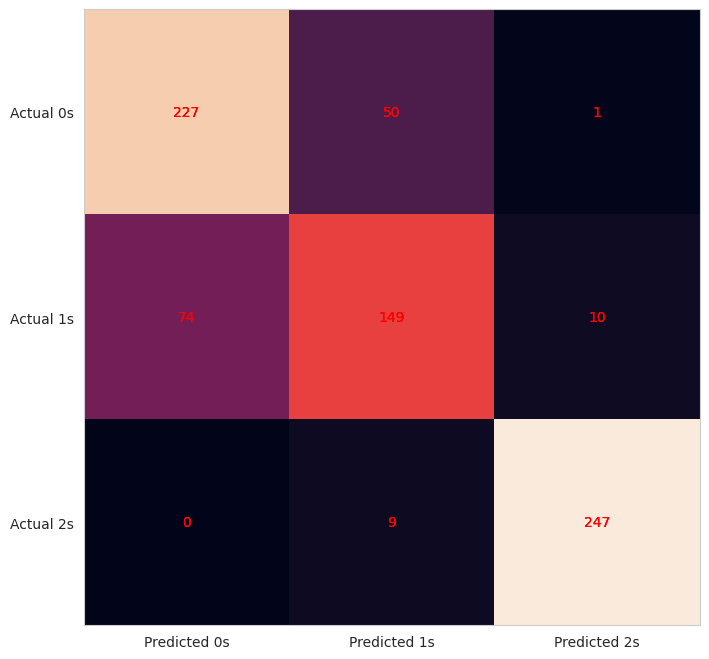

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
print_accuracy(model,cv)

**Gaussian Naïve Bayes**

Accuracy of no SMOTE: 0.616 (0.041)
Accuracy of SMOTE Data: 0.567 (0.019)
Accuracy of ADASYN Data: 0.549 (0.022)
Accuracy of SMOTE+ ENN Data: 0.791 (0.025)
Accuracy of SMOTE + TOMEK Data: 0.601 (0.033)
Accuracy on testing data of SMOTE+ ENN:  0.8085676037483266
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.813 (0.020)
Precision on testing data of SMOTE+ ENN: 0.8478254381799141
Recall on testing data of SMOTE+ ENN:  0.8085676037483266
F1 score of SMOTE+ ENN: 0.8104193204900745
Macro-averaged F1 score: 0.8089681767802981
Micro-averaged precision score: 0.8085676037483266
MAE: 0.1927710843373494
MSE: 0.19544846050870146
RMSE: 0.4420955332376719
SCORE: 0.8085676037483266
R-squared value: 0.7200739200739199


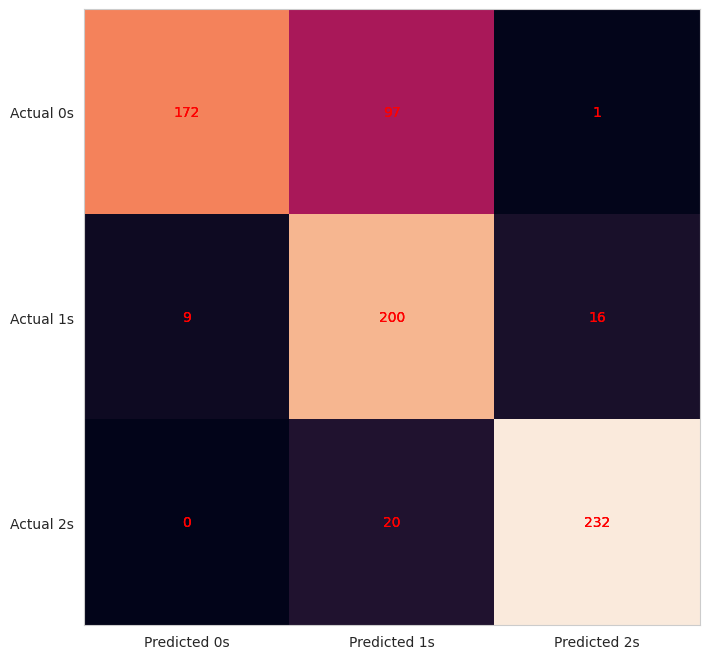

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print_accuracy(model,cv)

**Random Forest**

Accuracy of no SMOTE: 0.725 (0.022)
Accuracy of SMOTE Data: 0.811 (0.016)
Accuracy of ADASYN Data: 0.804 (0.015)
Accuracy of SMOTE+ ENN Data: 0.965 (0.012)
Accuracy of SMOTE + TOMEK Data: 0.844 (0.016)
Accuracy on testing data of SMOTE+ ENN:  0.8462566844919787
Accuracy of SMOTE+ ENN Data without RepeatedStratifiedKFold: 0.949 (0.023)
Precision on testing data of SMOTE+ ENN: 0.8424551242294975
Recall on testing data of SMOTE+ ENN:  0.8462566844919787
F1 score of SMOTE+ ENN: 0.843022627617007
Macro-averaged F1 score: 0.8401355618376894
Micro-averaged precision score: 0.8462566844919787
MAE: 0.1537433155080214
MSE: 0.1537433155080214
RMSE: 0.39210115468845713
SCORE: 0.8462566844919787
R-squared value: 0.7786184887790817


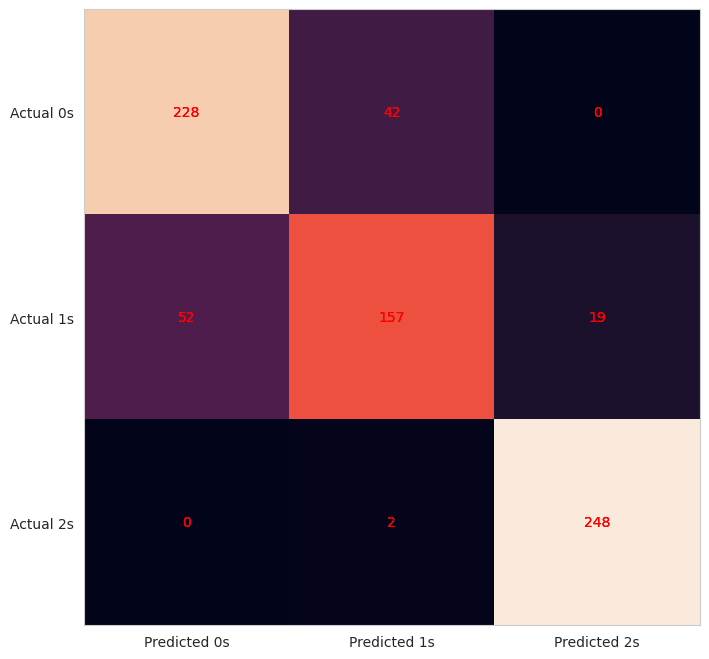

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
print_accuracy(model,cv)